# Example of finding the gabor receptive field of a given neuron model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fitgabor import GaborGenerator, trainer_fn
from fitgabor.utils import gabor_fn

---

## Creat a model neuron

In [3]:
import torch
from torch import nn
from torch.nn import functional as F

class Neuron(nn.Module):
    def __init__(self, rf):
        super().__init__()
        h, w = rf.shape
        self.rf = torch.tensor(rf.reshape(1, 1, h, w).astype(np.float32))
        
    def forward(self, x):
        return F.elu((x * self.rf).sum()) + 1

In [4]:
theta = -np.pi/4
rf = gabor_fn(theta, sigma=7, Lambda=14, psi=np.pi/2, gamma=1, center=(15, 15), size=(64, 64))

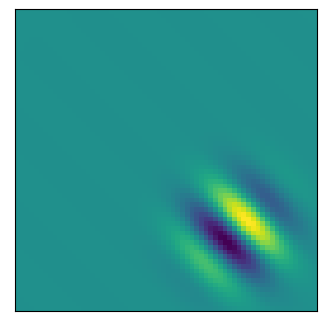

In [5]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.imshow(rf);
ax.set(xticks=[], yticks=[]);

In [6]:
neuron = Neuron(rf)

---

## Create a gabor generator

In [7]:
_, _, h, w = neuron.rf.shape

In [8]:
torch.manual_seed(420)
gabor_gen = GaborGenerator(image_size=(h, w))

---

## Gabor vs. true RF before training

In [9]:
learned_rf = gabor_gen().squeeze().cpu().data.numpy()
true_rf = neuron.rf.squeeze().cpu().data.numpy()

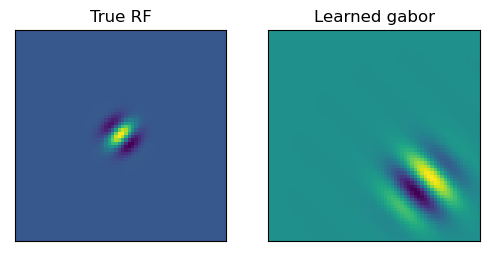

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=100)
ax1.imshow(learned_rf);
ax1.set(xticks=[], yticks=[], title="True RF")

ax2.imshow(true_rf);
ax2.set(xticks=[], yticks=[], title="Learned gabor");

---

## Train the gabor generator to maximizes the model output

In [12]:
from torch import optim

In [13]:
gabor_gen, evolved_rfs = trainer_fn(gabor_gen, neuron, optimizer=optim.LBFGS, lr=5e-3, save_rf_every_n_epoch=10)

Loss: -6.61:   1%|▊                                                                | 269/20000 [00:09<11:49, 27.82it/s]


---

## Learning evolution of the gabor generator

In [17]:
len(evolved_rfs)

27

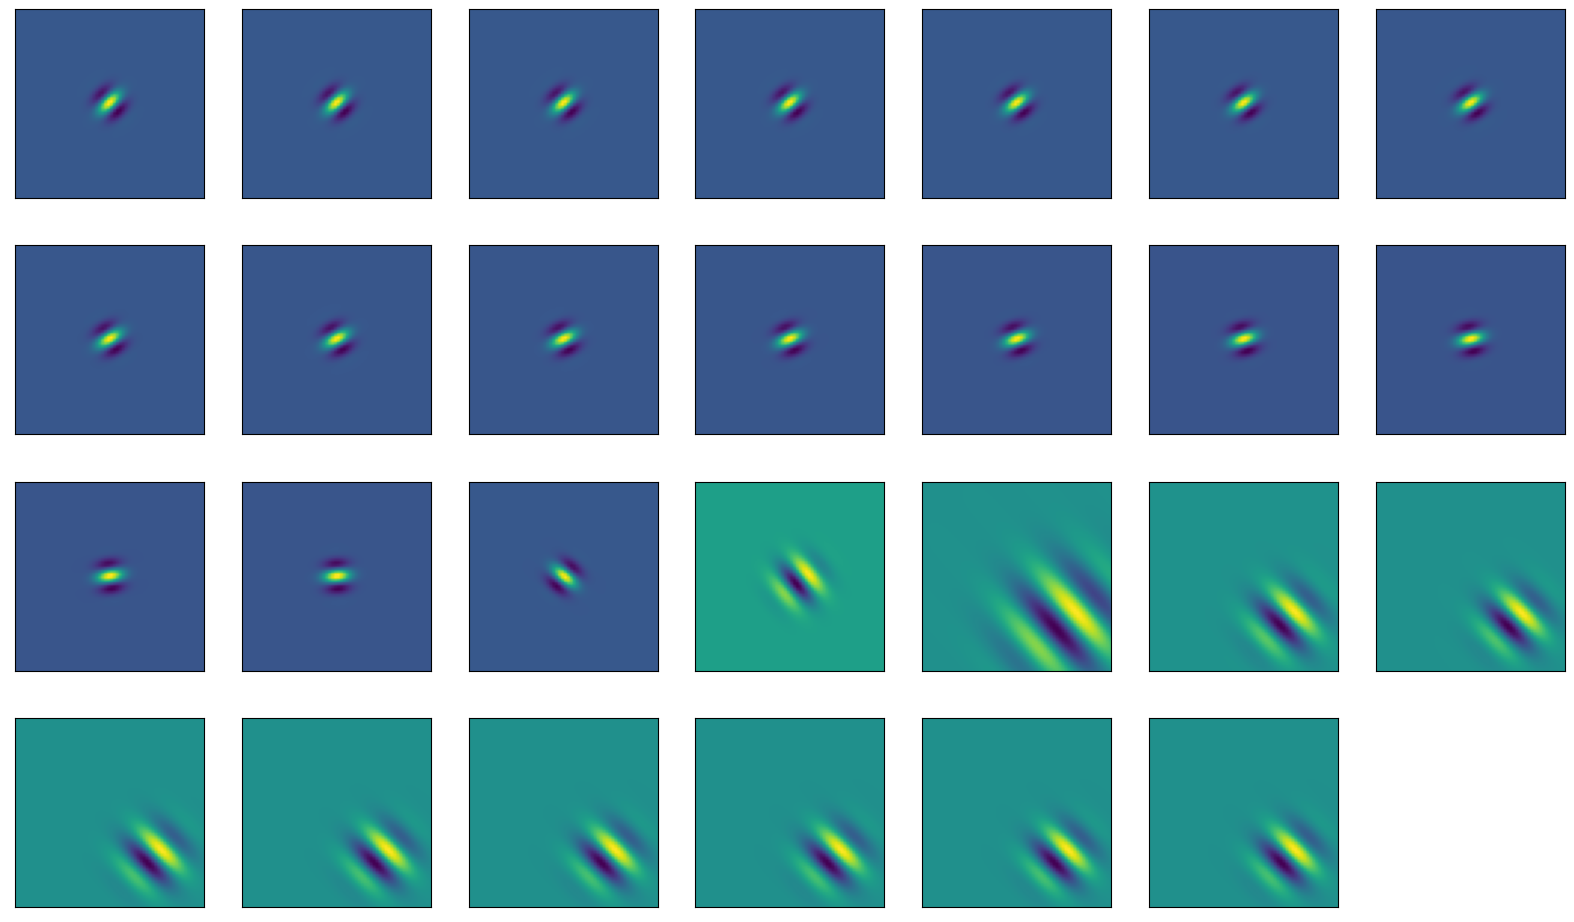

In [19]:
n_rows = 4
n_cols = (len(evolved_rfs) + n_rows - 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, dpi=100, figsize=(20, 12))

for ind, ax in enumerate(axes.flat):
    if ind < len(evolved_rfs):
        ax.imshow(evolved_rfs[ind])
        ax.set(xticks=[], yticks=[])
    else:
        ax.axis('off')

---

## Gabor vs. true RF after training

In [15]:
learned_rf = gabor_gen().squeeze().cpu().data.numpy()
true_rf = neuron.rf.squeeze().cpu().data.numpy()

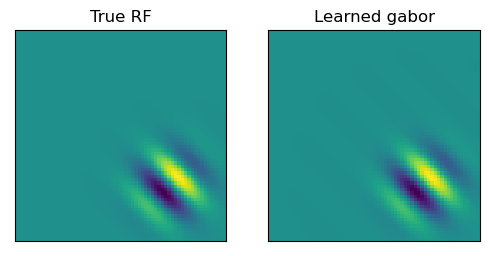

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=100)

ax2.imshow(true_rf);
ax1.set(xticks=[], yticks=[], title="True RF")

ax1.imshow(learned_rf);
ax2.set(xticks=[], yticks=[], title="Learned gabor");